# test tika to convert documents in directory: documents
- First prepare docs.txt by doing in linux:
    > ls Engineering > docs.txt
    > Category = Directory name

#### Note: convert pdf to tiff with ghostscript
**gs -q -dNOPAUSE -sDEVICE=tiffg4 -sOutputFile=test10.tiff test10.pdf -c quit**

#### Note: gimp save tiff files without layers
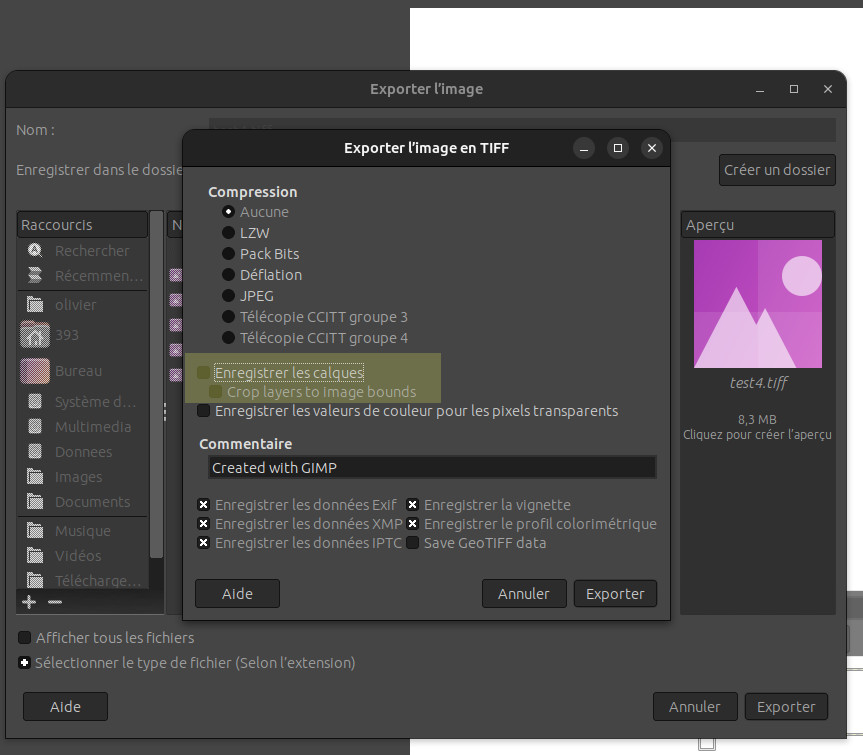

In [15]:
import os
import re
from tika import parser
from metadata_mongo_model import *
from datetime import datetime

In [2]:
import global_variables as g
g.init()

In [3]:

connect('tika_metadata')

now = datetime.now()
 
#print("now =", now)

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
#print("date and time =", dt_string)

category="Engineering"

dirlist = os.listdir(category)


In [42]:
metadata_ref = open("metadata_ref.txt","r").read()
print(metadata_ref)
rows = metadata_ref.split('\n')
print(rows[0:-1])

aircraft
part

['aircraft', 'part']


In [4]:
def load_db_files(category,name,fulldir,inode):
    if g.DEBUG_OL >= 1:
        print('function: load_database tika_metadata',category,name,fulldir,inode,')')
    checkexistingfile=files.objects(fileid=inode).first()
    if checkexistingfile != None:
        message="File with inode: "+str(checkexistingfile.fileid)+" already exists"
        return message

    if g.DEBUG_OL >= 2:
        print('New file created with fileid=',createdfiles.fileid)
    now = datetime.now()
    creationdate = now.strftime("%d/%m/%Y %H:%M:%S")
    item=files()
    item.fileid = inode
    item.filename = name
    item.filedirectory = full_dir
    item.Category = category
    item.save()

    createdfiles=files.objects(fileid=inode).first()
    if g.DEBUG_OL >= 2:
        print('New file created with fileid=',createdfiles.fileid)
    message="File with inode: "+str(createdfiles.fileid)+" created !"
    return message

In [38]:
def load_db_metadata(inode,metadata,value):
    return

In [ ]:
def search_metadata(line):
    
    return

In [40]:
for i in dirlist:
    xx=[]
    str_match=[]
#    print("-----------------------\n",i)
    full_dir=os.path.abspath(category)
    aa=category+'/'+i
    inode=os.stat(aa).st_ino
    print(full_dir,i,inode)
    parsed_file = parser.from_file(aa)
    my_content = parsed_file['content']
    xx = my_content.split('\n')
#    print(xx[0:-1])
    Aircraft=""
    PN=""
    Aircraft = [s for s in xx if "Aircraft" in s]
    Part = [s for s in xx if "Part" in s] 
#    print(Aircraft)
    if Aircraft:
        AC_work= Aircraft[0].replace('\xa0','').replace('\t', ' ').replace(' : ',' ').replace(': ',' ').replace(':',' ').replace(', ',' ').replace(',',' ').split(' ')
#        print(AC_work)
        aa=AC_work.index('Aircraft')
#        print(aa)
        AC=AC_work[int(aa)+1]
        
    if Part:
        PN_work=Part[0].replace('\xa0','').replace('\t', ' ').replace(' : ',' ').replace(': ',' ').replace(':',' ').replace(', ',' ').replace(',',' ').split(' ')
#        print(PN_work)
        aa=0
        if "Number" in PN_work:
            aa=PN_work.index("Number")
        elif "NO" in PN_work:
            aa=PN_work.index('NO')
        else:
            aa=PN_work.index('Part')
#        print(aa)
        PN = PN_work[int(aa)+1]
            


    print(category,i,full_dir,inode,"\tAircraft:",AC," - Part Number:",PN)
#    result=load_db_files(category,i,full_dir,inode)
#    print(result)
#    print(str_match)
#    print(my_content)

/media/olivier/Donnees/Documents/Formations/tika/Engineering test2.jpg 113787699
Engineering test2.jpg /media/olivier/Donnees/Documents/Formations/tika/Engineering 113787699 	Aircraft: A330  - Part Number: 10011
/media/olivier/Donnees/Documents/Formations/tika/Engineering test5.odt 113787705
Engineering test5.odt /media/olivier/Donnees/Documents/Formations/tika/Engineering 113787705 	Aircraft: A340  - Part Number: 299999
/media/olivier/Donnees/Documents/Formations/tika/Engineering test1.png 113787698
Engineering test1.png /media/olivier/Donnees/Documents/Formations/tika/Engineering 113787698 	Aircraft: A320  - Part Number: 10010
/media/olivier/Donnees/Documents/Formations/tika/Engineering test3.jpg 113787700
Engineering test3.jpg /media/olivier/Donnees/Documents/Formations/tika/Engineering 113787700 	Aircraft: A320  - Part Number: 20011
/media/olivier/Donnees/Documents/Formations/tika/Engineering test13.odt 113788252
Engineering test13.odt /media/olivier/Donnees/Documents/Formations/ti

In [ ]:
#if g.DEBUG_OL >= 1:
print(os.getcwd(),__name__,'imported')